# MLPS HW1 Michelle Hsu; mhsu1

In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st
from random import shuffle

In [3]:
os.getcwd()

'/Users/michellehsu/Desktop/CMU/Spring 2018/95-828 ML for Problem Solving/Assignment/HW1/submit_hw1'

In [4]:
emp = pd.read_csv("termination.csv")

FileNotFoundError: File b'termination.csv' does not exist

### 5 a. Summary of the data

In [580]:
emp.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1954-01-03,1989-08-28,1900-01-01,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1954-01-03,1989-08-28,1900-01-01,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1954-01-03,1989-08-28,1900-01-01,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1954-01-03,1989-08-28,1900-01-01,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1954-01-03,1989-08-28,1900-01-01,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [581]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
EmployeeID             49653 non-null int64
recorddate_key         49653 non-null object
birthdate_key          49653 non-null object
orighiredate_key       49653 non-null object
terminationdate_key    49653 non-null object
age                    49653 non-null int64
length_of_service      49653 non-null int64
city_name              49653 non-null object
department_name        49653 non-null object
job_title              49653 non-null object
store_name             49653 non-null int64
gender_short           49653 non-null object
gender_full            49653 non-null object
termreason_desc        49653 non-null object
termtype_desc          49653 non-null object
STATUS_YEAR            49653 non-null int64
STATUS                 49653 non-null object
BUSINESS_UNIT          49653 non-null object
dtypes: int64(5), object(13)
memory usage: 6.8+ MB


In [582]:
emp.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


From the above summary table, we can spot some meaningless quantity such as the statistics for EmployeeID. For example, the mean, std, min, max, and quartiles for the EmployeeID don't convey any information. Other variables such as store_name and STATUS_YEAR also share the same problem. These variables should be categorical variables rather than numerical variables.

### 5 b. (1) Compute the % of terminated employees out of all employees for each year

In [583]:
len(emp) #49653 rows
len(emp.columns) #18 columns

18

In [584]:
terminated = []

In [585]:
for i in list(emp.STATUS_YEAR.unique()):
    cal = len(emp[(emp.STATUS_YEAR == i) & (emp.STATUS == 'TERMINATED')].EmployeeID.unique())/len(emp[emp.STATUS_YEAR == i].EmployeeID.unique())
    terminated.append(round(cal*100, 2))

In [586]:
result = pd.DataFrame(list(emp.STATUS_YEAR.unique()), columns = ['Year'], index = range(1,11))
result['Terminated_Rate %'] = terminated
result

,Year,Terminated_Rate %
1,2006,2.93
2,2007,3.46
3,2008,3.44
4,2009,2.93
5,2010,2.48
6,2011,2.16
7,2012,2.49
8,2013,1.97
9,2014,4.85
10,2015,3.27


### 5 b. (2) Compute the average termination rate over the 10 years 

In [587]:
result['Terminated_Rate %'].mean()

2.998

### 5 c. Stacked Bar Chart( X : STATUS_YEAR; Y : number of terminated employees with various type)

In [588]:
temp = emp.groupby(['STATUS_YEAR', 'termreason_desc'])['STATUS_YEAR'].count().unstack('termreason_desc')
temp

termreason_desc,Layoff,Not Applicable,Resignaton,Retirement
STATUS_YEAR,,,,
2006,137,3424,133,885
2007,147,3601,171,764
2008,162,3792,186,627
2009,175,3986,203,488
2010,181,4165,253,364
2011,193,4352,267,270
2012,207,4529,266,229
2013,215,4668,262,175
2014,215,4668,213,119


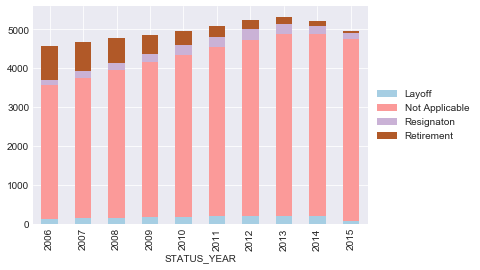

In [589]:
temp.plot(kind='bar', stacked = True, colormap = 'Paired')
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))

From the above stacked bar chart, we can know that the primary reason for employee termination from 2006 to 2015 was due to "Not Applicable". Also, the number of "Retirement" type of termination decreased over the years. Year 2013 seemed to be peak for employee termination, and after that year, the termination condition started to reduce.

### 5 d. Box-plot of Age for active and terminated employees

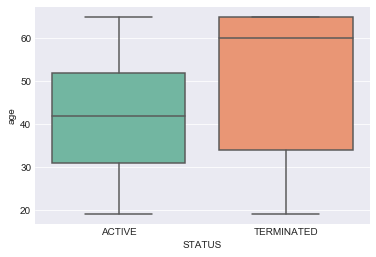

In [590]:
sns.boxplot(x="STATUS", y="age", data = emp, palette="Set2")

Based on the above boxplot, the age median for terminated employees is higher, which is alomost 60 with interquartile range(IQR) of 34 to 65; on the other hand, active employees seem to be younger with median in roughly 42 and the IQR is more compact ranging from 32 to 53. The reason for the differences in IQR for active and terminated employees might be due to the various type of terminated reasons. Some employee termination is caused by retirement, from people who tend to be older, others might be owing to not applicable, lay off, or resignation. Therefore, the IQR of age for terminated employees is wider than active employees.

### 5 e. Kernel Density Estimation of Length of Service for active and  terminated employees

### 5 e.(A) Uniformly sample points between [0, 30] with interval 0.1

In [1]:
u = np.arange(0,30.1,0.1)

NameError: name 'np' is not defined

u = np.arange(0,30.1,0.1)

### 5 e.(B) Write custom kernel density estimation function

In [592]:
def kde_cal_active(x):
    diff = []
    for i in emp[emp.STATUS == 'ACTIVE'].length_of_service:
        diff.append(x - i)
    density = st.norm.pdf(diff,0,1)
    nkde = density.sum()/len(emp[emp.STATUS == 'ACTIVE'].length_of_service)
    return nkde

### 5 e.(C) Compute the KDE for each of the sampled points in (A) and plot the final density estimate

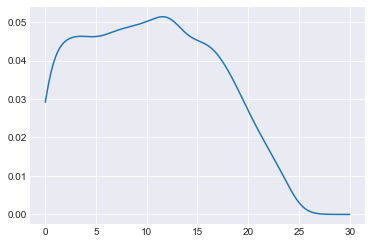

In [593]:
result = []
for j in u:
    tkde = kde_cal_active(j)
    result.append(tkde)
plt.plot(u, result)

### 5 e.(D) Repeat step (B) and (C), plot the KDE for terminated employees

In [594]:
def kde_cal_terminated(x):
    diff = []
    for i in emp[emp.STATUS == 'TERMINATED'].length_of_service:
        diff.append(x - i)
    density = st.norm.pdf(diff,0,1)
    nkde = density.sum()/len(emp[emp.STATUS == 'TERMINATED'].length_of_service)
    return nkde

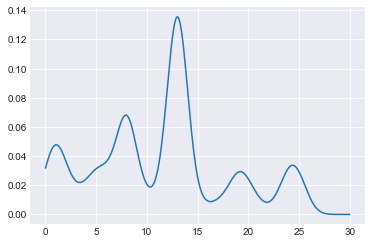

In [595]:
result1 = []
for j in u:
    tkde = kde_cal_terminated(j)
    result1.append(tkde)
plt.plot(u, result1)

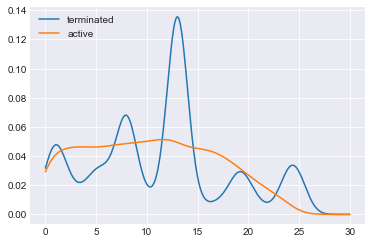

In [596]:
plt.hold(True)
plt.plot(u, result1)
plt.plot(u, result)
plt.legend(['terminated', 'active'], loc='upper left')
plt.show()

From the above KDE plot, the length of service for terminated employee was very varied compared to active employees. Besides, there are several peaks for the employee termination curve, whereas the curve for active employees is relatively smooth.

In [598]:
#Alternative method: use seaborn package sns.kdeplot to plot
#k1 = sns.kdeplot(emp[emp.STATUS == 'TERMINATED'].length_of_service)
#k2 = sns.kdeplot(emp[emp.STATUS == 'ACTIVE'].length_of_service)
#plt.legend(['terminated', 'active'], loc='upper left')

### 6. Applied Linear Regression

In [601]:
wage = pd.read_csv("Wage.csv")

In [602]:
wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [607]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 231655 to 453557
Data columns (total 12 columns):
year          3000 non-null int64
age           3000 non-null int64
sex           3000 non-null object
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 384.7+ KB


In [608]:
wage.describe()

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


### 6 a. Regress Wage on Age (show the result and scatter plot)

In [609]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [610]:
lmresult = smf.ols('wage ~ age', data = wage).fit()
print(lmresult.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     119.3
Date:                Sun, 18 Feb 2018   Prob (F-statistic):           2.90e-27
Time:                        15:04:30   Log-Likelihood:                -15391.
No. Observations:                3000   AIC:                         3.079e+04
Df Residuals:                    2998   BIC:                         3.080e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.7047      2.846     28.706      0.0

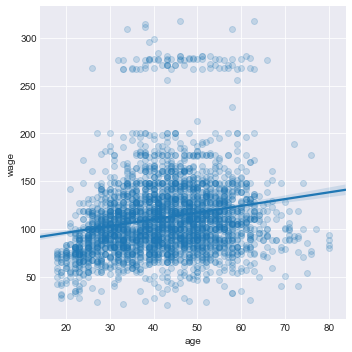

In [622]:
sns.lmplot("age", "wage", data = wage, fit_reg = True, scatter_kws={'alpha':0.2})

### 6 b. Regress Wage on Age, Jobclass, and their interaction (interpret the result)

In [623]:
lmresult1 = smf.ols('wage ~ age + jobclass + age*jobclass', data = wage).fit()
print(lmresult1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     80.78
Date:                Sun, 18 Feb 2018   Prob (F-statistic):           2.99e-50
Time:                        15:39:34   Log-Likelihood:                -15333.
No. Observations:                3000   AIC:                         3.067e+04
Df Residuals:                    2996   BIC:                         3.070e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

According to the regression 'wage ~ age + jobclass + age*jobclass', the coefficients for age and jobclass are 0.7197 and 22.7309 respectively, both of which are statistically significant with p-value 0.00. For age, an increase in age is associated with 0.7197 increase in wage, holding other factors constant. For jobclass, having a jobclass of "Information" is related to an 22.7309 increase in wage, holding other factors constant. Regarding the interaction term(age*jobclass), the coefficient is not significant. Therefore, from this regression model, the level change in wage due to age is not related to having a jobclass of "Information" or "Industrial".

### 6 c. Regress Wage on fourth-degree polynomial in Age.(show the result and scatter plot) What did you learn?

In [668]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [717]:
poly = PolynomialFeatures(degree=4)
page = poly.fit_transform(wage.age.reshape(-1, 1))
#Age has been transformed to [1, age, age^2, age^3, age^4], and can now be used within any linear model.
lg = LinearRegression()
lg.fit(page, wage.wage)
params = np.append(lg.intercept_,lg.coef_)
print(params)

[ -1.84154180e+02   0.00000000e+00   2.12455205e+01  -5.63859313e-01
   6.81068771e-03  -3.20383038e-05]


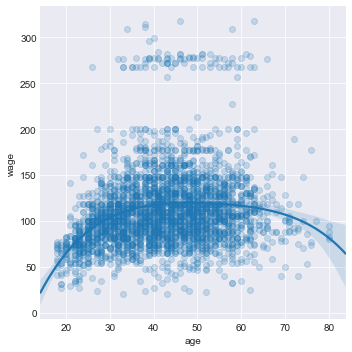

In [701]:
sns.lmplot("age", "wage", data = wage, order=4, fit_reg = True, scatter_kws={'alpha':0.2})

From the result, we can see that the relationship between age and wage is not linear. From age 20 to 30, the trend of wage increased and stablized at age 20 to 60. After age of 60, the wage started to reduce.

### 6 d. Regress Wage on all variables and all the 2-way interactions.

In [719]:
wage.columns

Index(['year', 'age', 'sex', 'maritl', 'race', 'education', 'region',
       'jobclass', 'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [913]:
X = wage[['year', 'age', 'maritl', 'race', 'education', 'jobclass', 'health', 'health_ins']]

In [922]:
Y = wage['wage']

In [923]:
#One-Hot encoding
m = pd.get_dummies(X.maritl)
r = pd.get_dummies(X.race)
e = pd.get_dummies(X.education)
j = pd.get_dummies(X.jobclass)
h = pd.get_dummies(X.health)
hi = pd.get_dummies(X.health_ins)

In [924]:
newX = X[['year', 'age']]

In [925]:
alldata = newX.join(m).join(r).join(e).join(j).join(h).join(hi)

In [926]:
interaction = PolynomialFeatures(degree=2, interaction_only= True, include_bias = True)

In [929]:
interX= interaction.fit_transform(alldata)

In [937]:
wage.index = range(3000)
lmresult2 = smf.ols('wage ~ age + year + maritl + race + education + jobclass + health + health_ins + interX', data = wage).fit()
print(lmresult2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     14.19
Date:                Sun, 18 Feb 2018   Prob (F-statistic):          7.18e-210
Time:                        19:55:36   Log-Likelihood:                -14753.
No. Observations:                3000   AIC:                         2.975e+04
Df Residuals:                    2879   BIC:                         3.047e+04
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

### 6 e. Run Lasso regression to enforce regularization with λ =0.04. Compare result with part (d) by scatter plot where x is the coefficient from unregularized linear regression and y is the corresponding coefficient from Lasso.

In [905]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.04)

In [906]:
lasso

Lasso(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [907]:
lasso.fit(alldata, wage.wage, check_input=True)

Lasso(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [908]:
lasso.coef_

array([  1.23539672,   0.27381028,  -4.11019142,  12.87777491,
        -0.        ,  -0.        ,   4.93515915,   3.29437778,
        -1.36064223,   0.        ,  -0.        , -17.91175785,
       -10.46593083,  -0.        ,  12.82344507,  35.45343906,
        -3.51785422,   0.        ,  -6.43581939,   0.        ,
        17.4217917 ,  -0.        ])

In [909]:
df = pd.DataFrame(interX) 
alldata.index = range(3000)
alldf= alldata.join(df)

In [910]:
lasso.fit(alldf, wage.wage, check_input= True)

Lasso(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

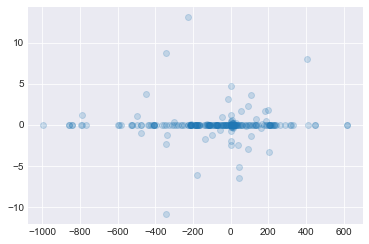

In [963]:
lacoef = lasso.coef_
lcoef = lmresult4.params
plt.scatter(lcoef,lacoef[0:271],alpha=0.2)

From the scatter plot, we can see that lots of the Lasso's coefficients collapse to 0 compared to unregularized linear regression. 

### 7. Naive Bayes

In [965]:
voc = pd.read_csv("vocabulary.csv")
xtrain = pd.read_csv("XTrain.csv")
ytrain = pd.read_csv("yTrain.csv")
xtest = pd.read_csv("XTest.csv")
ytest = pd.read_csv("yTest.csv")

In [981]:
voc.head()
voc.info()
len(voc) # 26047 rows
voc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26047 entries, 0 to 26046
Data columns (total 1 columns):
after    26047 non-null object
dtypes: object(1)
memory usage: 203.6+ KB


,after
count,26047
unique,26047
top,implement
freq,1


In [979]:
xtrain.info()
len(xtrain) # 579 rows
ytrain.info()
len(ytrain) # 579 rows
xtest.info()
len(xtest) # 144 rows
ytest.info()
len(ytest) # 144 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Columns: 26048 entries, 1 to 0.24961
dtypes: int64(26048)
memory usage: 115.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 1 columns):
1    579 non-null int64
dtypes: int64(1)
memory usage: 4.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Columns: 26048 entries, 0 to 0.24958
dtypes: int64(26048)
memory usage: 28.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
1    144 non-null int64
dtypes: int64(1)
memory usage: 1.2 KB


144

In [983]:
xtrain.describe()

,1,1.1,0,0.1,0.2,0.3,0.4,0.5,1.2,0.6,...,0.24953,0.24954,0.24955,0.24956,0.24957,1.1085,0.24958,0.24959,0.24960,0.24961
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,...,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,0.604491,0.941278,0.329879,0.098446,0.065630,0.053541,0.537133,0.269430,0.082902,0.259067,...,0.015544,0.027634,0.044905,0.024180,0.027634,0.024180,0.027634,0.025907,0.032815,0.032815
std,0.489383,0.235307,0.470576,0.298174,0.247849,0.225303,0.499050,0.444047,0.275972,0.438501,...,0.123810,0.164063,0.207275,0.153739,0.164063,0.153739,0.164063,0.158994,0.178307,0.178307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [985]:
ytrain.describe()

,1
count,579.000000
mean,0.271157
std,0.444941
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [986]:
xtest.describe()

,0,1,1.1,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,0.24949,0.24950,0.24951,0.24952,0.24953,0.24954,0.24955,0.24956,0.24957,0.24958
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.541667,0.951389,0.319444,0.083333,0.048611,0.055556,0.527778,0.277778,0.097222,0.222222,...,0.020833,0.013889,0.020833,0.027778,0.041667,0.013889,0.027778,0.055556,0.020833,0.034722
std,0.500000,0.215804,0.467889,0.277350,0.215804,0.229861,0.500970,0.449467,0.297294,0.417191,...,0.143325,0.117438,0.143325,0.164909,0.200524,0.117438,0.164909,0.229861,0.143325,0.183714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [987]:
ytest.describe()

,1
count,144.000000
mean,0.319444
std,0.467889
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### 7 a. Fit the Naive Bayes classifier and produce a confusion matrix. Plot the matrix as a heatmap.

In [1099]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0).fit(xtrain, ytrain)
predicted = nb.predict(xtest)

In [1100]:
p = pd.DataFrame(predicted)
p = p.join(ytest)
p.columns = ['predicted', 'actual']
p.head()

,predicted,actual
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [1101]:
from sklearn.metrics import confusion_matrix

In [1102]:
cm = confusion_matrix(p.actual, p.predicted)

Text(0.5,1,'Confusion matrix without Laplacian smoothing')

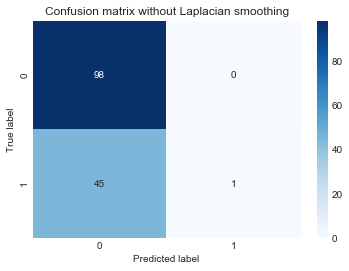

In [1159]:
sns.heatmap(cm, cmap='Blues' , annot = True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix without Laplacian smoothing')

### 7 b. Calculate the precision and recall with The Onion as the positive class

In [1117]:
tp = cm[1,1]
fp = cm[0,1]
tn = cm[0,0]
fn = cm[1,0]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print('Precision is',precision)
print('Recall is',recall)

Precision is 1.0
Recall is 0.0217391304348


### 7 c. Calculate the precision and recall with The Economist as the positive class

In [1118]:
tp_e = cm[0,0]
fp_e = cm[1,0]
tn_e = cm[1,1]
fn_e = cm[0,1]
precision_e = tp_e/(tp_e+fp_e)
recall_e = tp_e/(tp_e+fn_e)
print('Precision is',precision_e)
print('Recall is',recall_e)

Precision is 0.685314685315
Recall is 1.0


### 7 d. Misclassification rate of Naive Bayes

In [1119]:
# The Onion is positive
misclassification_o = (fp+fn)/(fp+fn+tp+tn)
misclassification_o 

0.3125

In [1127]:
# The Economist is positive
misclassification_e = (fp_e+fn_e)/(fp_e+fn_e+tp_e+tn_e)
print('Misclassification rate is', misclassification_e)

Misclassification rate is 0.3125


### 7 e.  Misclassification rate with Laplacian smoothing of 1.0

In [1121]:
nbs = MultinomialNB(alpha = 1.0).fit(xtrain, ytrain)
predicteds = nbs.predict(xtest)

In [1122]:
ps = pd.DataFrame(predicteds)
ps = ps.join(ytest)
ps.columns = ['predicted', 'actual']

In [1123]:
cms = confusion_matrix(ps.actual, ps.predicted)

Text(0.5,1,'Confusion matrix with Laplacian smoothing of 1.0')

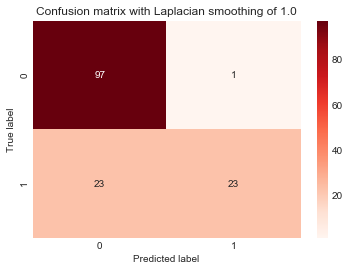

In [1157]:
sns.heatmap(cms, cmap='Reds', annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix with Laplacian smoothing of 1.0')

In [1126]:
tps = cms[1,1]
fps = cms[0,1]
tns = cms[0,0]
fns = cms[1,0]
misclassification= (fps+fns)/(fps+fns+tps+tns)
print("Misclassification rate is",misclassification)

Misclassification rate is 0.166666666667


### 7 f.  The true class and predicted class of the 45th observation. The estimated posterior probability for the 45th observation according to Naive Bayes.

In [1179]:
#Posterior probability: the probability that a particular object belongs to class i given its observed feature values
print(p[44:45])
print(p[44:45])
# We access the 44th row in the dataframe since the index starts from 0. Therefore, the 44th row is the 45th observation.

    predicted  actual
44          0       1
    predicted  actual
44          0       1


The true class of the 45th observation is 1, which is The Onion. On the other hand, the predicted class of the same observation is 0, which is The Economist.

In [1180]:
nb.predict_proba(xtest[44:45])

array([[  1.00000000e+00,   6.51647421e-43]])

In the Naive Bayes without Laplacian smoothing, the posterior of the 45th observation being The Economist and The Onion is 1.00000000e+00 and 6.51647421e-43 respectively.

In [1181]:
nbs.predict_proba(xtest[44:45])

array([[ 0.99875009,  0.00124991]])

In the Naive Bayes with Laplacian smoothing of 1.0, the posterior of the 45th observation being The Economist and The Onion is 0.99875009 and 0.00124991 respectively.